In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving anime.csv to anime.csv


In [5]:
df = pd.read_csv('anime.csv')

In [6]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nBasic Information about the Dataset:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nFirst few rows of the dataset:")
print(df.head())


Missing values in each column:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Statistical Summary:
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250

In [10]:
# Fill missing values in 'genre' with 'Unknown'
df['genre'] = df['genre'].fillna('Unknown')

# Fill missing values in 'type' with 'Unknown'
df['type'] = df['type'].fillna('Unknown')

# Fill missing values in 'rating' with the median rating
df['rating'] = df['rating'].fillna(df['rating'].median())

# Convert 'episodes' column to numeric, setting errors='coerce' will turn non-numeric values to NaN
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Fill missing episodes with the median number of episodes
df['episodes'] = df['episodes'].fillna(df['episodes'].median())


In [11]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [13]:
# Convert 'episodes' column to numeric values, setting errors='coerce' will turn non-numeric values to NaN
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Fill NaN values in 'episodes' with the median (without using inplace=True)
df['episodes'] = df['episodes'].fillna(df['episodes'].median())


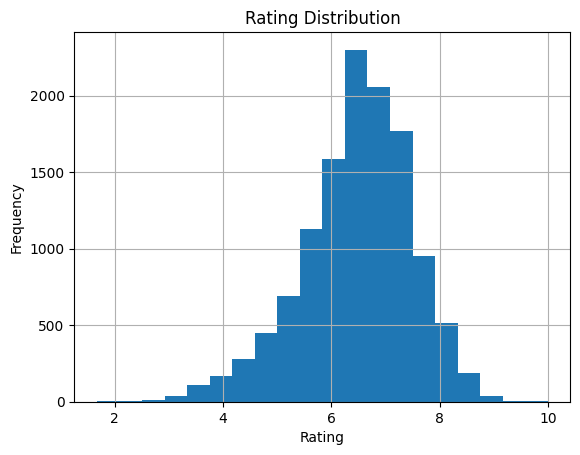

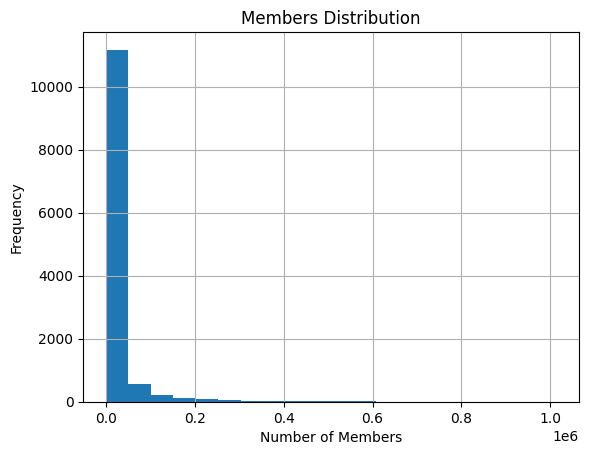

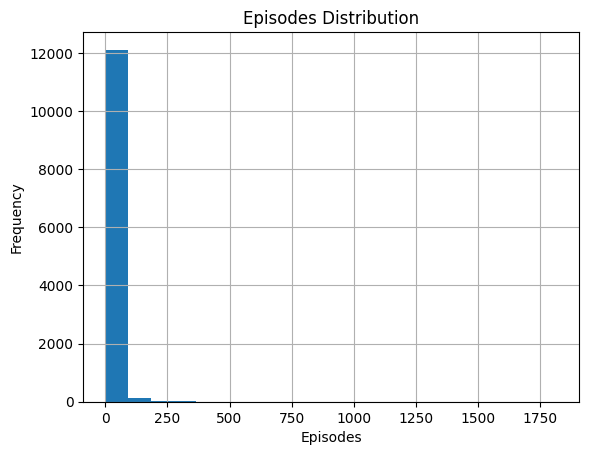

In [14]:
# Check distribution of numeric columns
import matplotlib.pyplot as plt

# Distribution of 'rating'
df['rating'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'members'
df['members'].hist(bins=20)
plt.title('Members Distribution')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'episodes'
df['episodes'].hist(bins=20)
plt.title('Episodes Distribution')
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Check unique values in 'genre' and 'type'
print("Unique genres:", df['genre'].unique())
print("Unique types:", df['type'].unique())


Unique genres: ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
Unique types: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' 'Unknown']


In [16]:
# Remove outliers in rating (e.g., ratings above 10 or below 1)
df = df[(df['rating'] <= 10) & (df['rating'] >= 1)]

# Remove outliers in members (e.g., members above a certain threshold)
df = df[df['members'] <= 1e6]


In [17]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [18]:
# One-Hot Encoding for 'genre' (splitting the genres by commas)
genre_dummies = df['genre'].str.get_dummies(sep=', ')  # Each genre will become a separate column

# Add the new genre columns to the original dataframe
df = pd.concat([df, genre_dummies], axis=1)


In [19]:
# One-Hot Encoding for 'type'
type_dummies = pd.get_dummies(df['type'])

# Add the new type columns to the original dataframe
df = pd.concat([df, type_dummies], axis=1)


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'rating' and 'episodes' columns
df[['rating', 'episodes']] = scaler.fit_transform(df[['rating', 'episodes']])


In [21]:
# Select the features: encoded genres, encoded type, rating, and episodes
final_features = df.drop(columns=['anime_id', 'name', 'genre', 'type', 'members'])

# Check the first few rows to ensure everything is set up correctly
final_features.head()


,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,Unknown
0,0.000000,0.924370,0,0,0,0,0,0,1,0,...,0,0,0,True,False,False,False,False,False,False
1,0.034673,0.911164,1,1,0,0,0,0,1,0,...,0,0,0,False,False,False,False,False,True,False
2,0.027518,0.909964,1,0,0,1,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False
3,0.012658,0.900360,0,0,0,0,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False
4,0.027518,0.899160,1,0,0,1,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(target_anime, df, threshold=0.7, top_n=5):
    """
    Recommends similar anime based on cosine similarity of features.

    Parameters:
    - target_anime: The name of the anime for which we are recommending similar ones.
    - df: The dataframe containing the anime data with features.
    - threshold: The minimum cosine similarity score for recommendations. (Default is 0.7)
    - top_n: The maximum number of recommendations to return. (Default is 5)

    Returns:
    - A list of recommended anime names with their similarity scores.
    """
    # Ensure the target anime is in the dataset
    if target_anime not in df['name'].values:
        return "Anime not found in the dataset."

    # Select features for similarity calculation (excluding irrelevant columns)
    features = df.drop(columns=['anime_id', 'name', 'genre', 'type', 'members'])

    # Calculate the cosine similarity matrix
    cosine_sim = cosine_similarity(features)

    # Create a DataFrame from the cosine similarity matrix
    cosine_sim_df = pd.DataFrame(cosine_sim, index=df['name'], columns=df['name'])

    # Get the similarity scores for the target anime
    sim_scores = cosine_sim_df[target_anime]

    # Sort the scores in descending order, and exclude the target anime itself
    sim_scores = sim_scores.sort_values(ascending=False)

    # Filter by the threshold to get only the most similar anime
    similar_animes = sim_scores[sim_scores > threshold].iloc[1:top_n+1]

    # Return the recommended anime with their similarity scores
    recommendations = similar_animes.index.tolist()
    recommendation_scores = similar_animes.values.tolist()

    return list(zip(recommendations, recommendation_scores))

# Example: Get top 5 similar anime to 'Fullmetal Alchemist: Brotherhood' with a threshold of 0.75
recommendations = recommend_anime('Fullmetal Alchemist: Brotherhood', df, threshold=0.75, top_n=5)
print(recommendations)


[('Fullmetal Alchemist', 0.9460915793679762), ('Magi: The Kingdom of Magic', 0.878997664154716), ('Magi: The Labyrinth of Magic', 0.8786048075799295), ('Magi: Sinbad no Bouken (TV)', 0.8785483626022851), ('Densetsu no Yuusha no Densetsu', 0.8777380246512573)]


In [23]:
# Define a range of threshold values to experiment with
threshold_values = [0.6, 0.7, 0.8, 0.9]

# Example target anime
target_anime = 'Fullmetal Alchemist: Brotherhood'

# Store the results for each threshold
threshold_results = {}

# Iterate through each threshold value and get the recommendations
for threshold in threshold_values:
    recommendations = recommend_anime(target_anime, df, threshold=threshold, top_n=5)
    threshold_results[threshold] = recommendations

# Print the results
for threshold, recommendations in threshold_results.items():
    print(f"Threshold: {threshold}")
    print("Recommendations:", recommendations)
    print("-" * 50)


Threshold: 0.6
Recommendations: [('Fullmetal Alchemist', 0.9460915793679762), ('Magi: The Kingdom of Magic', 0.878997664154716), ('Magi: The Labyrinth of Magic', 0.8786048075799295), ('Magi: Sinbad no Bouken (TV)', 0.8785483626022851), ('Densetsu no Yuusha no Densetsu', 0.8777380246512573)]
--------------------------------------------------
Threshold: 0.7
Recommendations: [('Fullmetal Alchemist', 0.9460915793679762), ('Magi: The Kingdom of Magic', 0.878997664154716), ('Magi: The Labyrinth of Magic', 0.8786048075799295), ('Magi: Sinbad no Bouken (TV)', 0.8785483626022851), ('Densetsu no Yuusha no Densetsu', 0.8777380246512573)]
--------------------------------------------------
Threshold: 0.8
Recommendations: [('Fullmetal Alchemist', 0.9460915793679762), ('Magi: The Kingdom of Magic', 0.878997664154716), ('Magi: The Labyrinth of Magic', 0.8786048075799295), ('Magi: Sinbad no Bouken (TV)', 0.8785483626022851), ('Densetsu no Yuusha no Densetsu', 0.8777380246512573)]
----------------------

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Show the split details
print(f"Training Set Size: {len(train_df)}")
print(f"Testing Set Size: {len(test_df)}")


Training Set Size: 9834
Testing Set Size: 2459


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(test_df, threshold=0.7, top_n=5):
    # Define a random "liked" set for testing purposes
    # Here, we randomly choose a few anime from the test set
    liked_set = test_df.sample(n=5, random_state=42)['name'].tolist()
    print(f"Liked Set: {liked_set}")

    # List to store the precision, recall, and f1-score for each recommendation
    y_true = []  # True labels (whether the anime is liked or not)
    y_pred = []  # Predicted labels (whether the anime is recommended)

    # Iterate through each anime in the test set and evaluate
    for anime in liked_set:
        print(f"Evaluating recommendations for: {anime}")

        recommendations = recommend_anime(anime, df, threshold=threshold, top_n=top_n)

        if len(recommendations) == 0:
            print(f"No recommendations found for {anime} with threshold {threshold}")

        # For each recommendation, check if it exists in the liked set
        for rec, score in recommendations:
            print(f"Recommended: {rec} with score {score}")
            y_true.append(1 if rec in liked_set else 0)  # 1 if liked, 0 if not
            y_pred.append(1)  # Predicted as recommended

    # Calculate precision, recall, and F1-score
    if len(y_true) > 0:
        precision = precision_score(y_true, y_pred, zero_division=1)
        recall = recall_score(y_true, y_pred, zero_division=1)
        f1 = f1_score(y_true, y_pred, zero_division=1)
    else:
        precision, recall, f1 = 0.0, 0.0, 0.0

    return precision, recall, f1

# Example: Evaluate the recommendation system with a threshold of 0.7 and top 5 recommendations
precision, recall, f1 = evaluate_recommendations(test_df, threshold=0.7, top_n=5)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Liked Set: ['Tsukimonogatari', 'Fluximation', 'Double Circle', 'Marginal Prince: Gekkeiju no Ouji-tachi - Tokyo Merry-Go-Round', 'Uchuujin Tanaka Tarou']
Evaluating recommendations for: Tsukimonogatari
Recommended: Nisemonogatari with score 0.9999983925048989
Recommended: Hanamonogatari with score 0.9999863867030778
Recommended: Owarimonogatari with score 0.9999330569650899
Recommended: UN-GO with score 0.8843861285757938
Recommended: Fukigen na Mononokean with score 0.8842303381669525
Evaluating recommendations for: Fluximation
Recommended: Wish with score 0.9999892028385104
Recommended: Utakata Hanabi with score 0.999988946521752
Recommended: Hashiri Hajimeta bakari no Kimi ni with score 0.9999881782042256
Recommended: Passion with score 0.9999851093657554
Recommended: Viva Namida with score 0.9999850891277114
Evaluating recommendations for: Double Circle
Recommended: Ima no Watashi ni Dekiru Koto... with score 0.8269686995770504
Recommended: Honey Tokyo with score 0.8256620246021253